# Подключаемые библиотеки

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import sin
from scipy import optimize #необходимо для Метода эйлера


# Производная

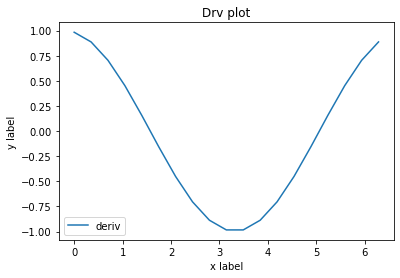

In [40]:
def genValuesSin(x0, x1):
    fValues = np.array([])
    delta = (x1 - x0) / 20
    
    d = 0
    while d + x0 < x1:
        value = math.sin(x0 + d)
        fValues = np.append(fValues, value)
        d += delta
    
    return fValues


def derivative(array, x0, x1):
    derives = np.array([])
    delta = (x1 - x0)/20
    
    for i in range(len(array) - 1):
        deriv = (array[i + 1] - array[i]) / delta
        derives = np.append(derives, deriv)
    
    return derives


def plotGraph(values, x0, x1):
    x = np.linspace(x0, x1, 19) 
    
    plt.plot(x, values, label='deriv')
    plt.xlabel('x label') 
    plt.ylabel('y label') 

    plt.title('Drv plot') 
    plt.legend()
    plt.show() 
    
x0 = 0;
x1 = 2 * math.pi
    
values = genValuesSin(x0, x1)

derives = derivative(values, x0, x1)

plotGraph(derives, x0, x1)

# Интегрирование

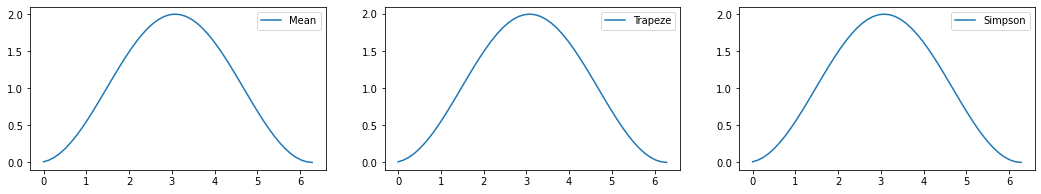

In [41]:
def integSin(x0, x1):
    delta = (x1 - x0) / 50
    x = x0
    fx0 = 0
    integValuesMean = np.array([])
    integValuesTrapeze = np.array([])
    integValuesSimpsons = np.array([])
    
    valueMean = 0
    valueTrapez = 0
    valueSimpson = 0
    
    while x < x1:
        valueMean += math.sin(x + delta / 2) * delta
        integValuesMean = np.append(integValuesMean, valueMean)
        
        valueTrapez += delta * (math.sin(x + delta) + math.sin(x)) / 2 
        integValuesTrapeze = np.append(integValuesTrapeze, valueTrapez)
        
        valueSimpson += 1/6 * delta * (math.sin(x) + 4 * sin(x + delta/2) + sin(x + delta))
        integValuesSimpsons = np.append(integValuesSimpsons, valueSimpson)
        
        x += delta
        
        
    x = np.linspace(x0, x1, 50)
    plt.figure(figsize=(18, 3))
    
    plt.subplot(131)
    plt.plot(x, integValuesMean, label='Mean') 
    plt.legend()
    plt.subplot(132)
    plt.plot(x, integValuesTrapeze, label='Trapeze')
    plt.legend()
    plt.subplot(133)
    plt.plot(x, integValuesSimpsons, label='Simpson')
    plt.legend() 
    
    plt.show() 

integSin(0, 2 * math.pi)    

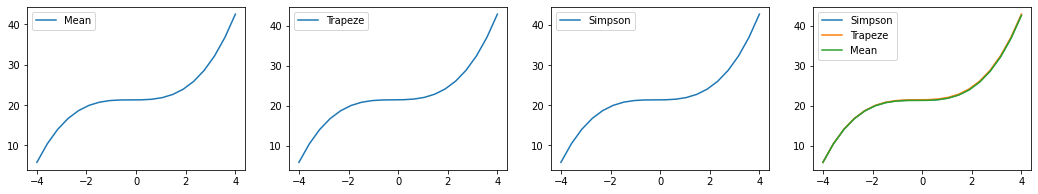

In [8]:
def integralOfFunc(x0, x1, func, fineness = 20):
    """
    integration of a given function on 
    a segment [x0 x1] with a given fineness
    of the partition
    
    """
    delta = (x1 - x0) / fineness
    x = x0

    integValuesMean = np.array([])
    integValuesTrapeze = np.array([])
    integValuesSimpsons = np.array([])
    
    valueMean = 0
    valueTrapez = 0
    valueSimpson = 0
    
    index = 0
    while x < x1 and index < fineness:
        valueMean += func(x + delta / 2) * delta
        integValuesMean = np.append(integValuesMean, valueMean)
        
        valueTrapez += delta * (func(x + delta) + func(x)) / 2 
        integValuesTrapeze = np.append(integValuesTrapeze, valueTrapez)
        
        valueSimpson += 1/6 * delta * (func(x) + 4 * func(x + delta/2) + func(x + delta))
        integValuesSimpsons = np.append(integValuesSimpsons, valueSimpson)
        
        x += delta
        index+=1
        
    x0x1 = np.linspace(x0, x1, fineness)
    plt.figure(figsize=(18, 3))
    
    plt.subplot(141)
    plt.plot(x0x1, integValuesMean, label='Mean') 
    plt.legend()
    
    plt.subplot(142)
    plt.plot(x0x1, integValuesTrapeze, label='Trapeze')
    plt.legend()
    
    plt.subplot(143)
    plt.plot(x0x1, integValuesSimpsons, label='Simpson')
    plt.legend() 
    
    plt.subplot(144)
    plt.plot(x0x1, integValuesSimpsons, label='Simpson')
    plt.plot(x0x1, integValuesTrapeze, label='Trapeze')
    plt.plot(x0x1, integValuesMean, label='Mean') 
    plt.legend()
    
    plt.show() 
    

    
sinF = lambda x:  math.sin(x) 
x2F = lambda x: x**2

    
integralOfFunc(-4, 4, x2F, 20)    

# Методы Эйлера для задачи Коши

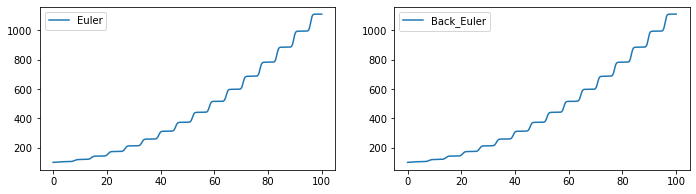

In [42]:
def euler(F, u0, tau, T):
    N_t = int(round(T/tau))
    F_ = lambda t, u: np.asarray(F(t, u))
    t = np.linspace(0, N_t*tau, N_t+1)
    u = np.zeros((N_t+1, len(u0)))
    u[0] = np.array(u0)
    for n in range(N_t):
        u[n+1] = u[n] + tau*F_(t[n], u[n])

    return u, t

def backward_euler(F, u0, tau, T):
    from scipy import optimize
    N_t = int(round(T/tau))
    F_ = lambda t, u: np.asarray(F(t, u))
    t = np.linspace(0, N_t*tau, N_t+1)
    u = np.zeros((N_t+1, len(u0)))
    u[0] = np.array(u0)

    def Phi(z, t, v):
        return z - tau*F_(t, z) - v
    
    for n in range(N_t):
        u[n+1] = optimize.fsolve(Phi, u[n], args=(t[n], u[n]))

    return u, t

def F(t, u):
        return t ** np.sin(t)

u, t = euler(F=F, u0=[100], tau=0.1, T=100)
u1, t1 = backward_euler(F=F, u0=[100], tau=0.1, T=100)

plt.figure(figsize=(18, 3))
plt.subplot(131)
plt.plot(t, u, label='Euler')
plt.legend()

plt.subplot(132)
plt.plot(t1, u1, label='Back_Euler')
plt.legend()

plt.show()

# Метод Рунге-кутта

In [11]:
def f(x,y):
    return x*np.sqrt(y)

def fi(x):
    return (x**2 + 4)**2 / 16

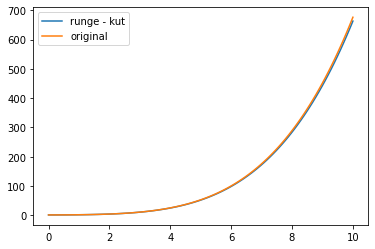

In [34]:
a = 0
b = 10
h = 0.1
n = int((b-a)/0.1)


x = np.linspace(a, b, n)
y = np.zeros(n, float)
y[0] = 1.

for i in range(1,n):
    k1 = f(x[i-1], y[i-1])
    k2 = f(x[i-1] + h/2, y[i-1] + h*k1/2)
    k3 = f(x[i-1] + h/2, y[i-1] + h*k2/2)
    k4 = f(x[i-1] + h, y[i-1] + h*k3)
    y[i] = y[i-1] + h*(k1+2*k2+2*k3+k4)/6   

plt.plot(x, y , label='runge - kut')
plt.plot(x, fi(x), label="original")
plt.legend()
plt.show()    